# 1.0 IMPORT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

## 1.1 Helper Fuctions

In [2]:
def grafdisplot(dt):
    sns.set(rc={'figure.figsize':(20, 10)})
    sns.distplot(dt, kde=True);
    
    return None


def boxplot1(x1, x2, x3, x4, y, df):
    
    plt.subplot(2, 2, 1)
    sns.boxplot(x=x1, y=y, data=df)
    
    plt.subplot(2, 2, 2)
    sns.boxplot(x=x2, y=y, data=df)

    plt.subplot(2, 2, 3)
    sns.boxplot(x=x3, y=y, data=df)

    plt.subplot(2, 2, 4)
    sns.boxplot(x=x4, y=y, data=df);

    return None


def categoricalvar(co1, c1, l1, c2, l2, c3, l3, c4, l4,
                   co2, c5, l5, c6, l6, c7, l7,
                   co3, c8, l8, c9, l9, c10, l10,
                   co4, c11, l11, c12, l12): 
    # level
    plt.figure(figsize=(25, 20))
    plt.subplot(4, 2, 1)
    sns.countplot(x=co1)

    plt.subplot(4, 2, 2)
    sns.kdeplot(x=c1, label=l1, shade=True)
    sns.kdeplot(x=c2, label=l2, shade=True)
    sns.kdeplot(x=c3, label=l3, shade=True)
    sns.kdeplot(x=c4, label=l4, shade=True)
    plt.legend()

    # dormitory_type
    plt.subplot(4, 2, 3)
    sns.countplot(x=co2)

    plt.subplot(4, 2, 4)
    sns.kdeplot(x=c5, label=l5, shade=True)
    sns.kdeplot(x=c6, label=l6, shade=True)
    sns.kdeplot(x=c7, label=l7, shade=True)
    plt.legend()
    
    # condition_type
    plt.subplot(4, 2, 5)
    sns.countplot(x=co3)

    plt.subplot(4, 2, 6)
    sns.kdeplot(x=c8, label=l8, shade=True)
    sns.kdeplot(x=c9, label=l9, shade=True)
    sns.kdeplot(x=c10, label=l10, shade=True)
    plt.legend()

    # data_age
    plt.subplot(4, 2, 7)
    sns.countplot(x=co4)

    plt.subplot(4, 2, 8)
    sns.kdeplot(x=c11, label=l11, shade=True)
    sns.kdeplot(x=c12, label=l12, shade=True)
    plt.legend();
    
    return None

## 1.2 Loding data

In [3]:
df1 = pd.read_csv('data/kc_house_data.csv')

# 2.0 Passo 01 - DESCRIÇÃO DOS DADOS

In [4]:
df2 = df1.copy()

## 2.1 Data Dimensions

In [5]:
print('Number of Rows: {}'.format(df2.shape[0]))
print('Number of Cols: {}'.format(df2.shape[1]))

Number of Rows: 21613
Number of Cols: 21


## 2.2 Data Types

In [6]:
df2['date'] = pd.to_datetime(df2['date'])
df2.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 2.3 Check NA

In [7]:
df2.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2.4 Descriptive Statistical

### 2.4.1 Numerical Attributes

In [8]:
num_attributes = df2.select_dtypes(include=['int64', 'float64'])
num_attributes = num_attributes.drop(columns=['id', 'yr_built', 'yr_renovated', 'zipcode', 
                                              'view', 'lat', 'long'])
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x : x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate
con_ = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
con_.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] 

In [9]:
con_

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.0,7700000.0,7625000.0,540088.141767,450000.00,367118.703181,4.024069,34.585540
1,bedrooms,0.0,33.0,33.0,3.370842,3.00,0.930040,1.974300,49.063653
2,bathrooms,0.0,8.0,8.0,2.114757,2.25,0.770145,0.511108,1.279902
3,sqft_living,290.0,13540.0,13250.0,2079.899736,1910.00,918.419649,1.471555,5.243093
4,sqft_lot,520.0,1651359.0,1650839.0,15106.967566,7618.00,41419.553273,13.060019,285.077820
5,floors,1.0,3.5,2.5,1.494309,1.50,0.539976,0.616177,-0.484723
6,waterfront,0.0,1.0,1.0,0.007542,0.00,0.086515,11.385108,127.632494
7,condition,1.0,5.0,4.0,3.409430,3.00,0.650728,1.032805,0.525764
8,grade,1.0,13.0,12.0,7.656873,7.00,1.175432,0.771103,1.190932
9,sqft_above,290.0,9410.0,9120.0,1788.390691,1560.00,828.071820,1.446664,3.402304


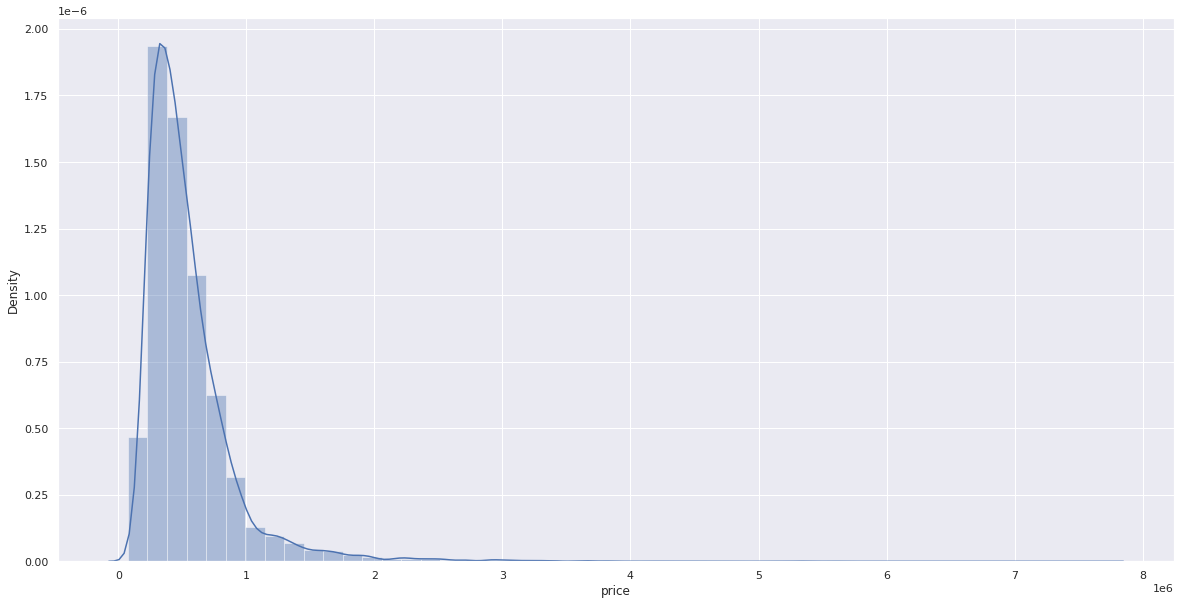

In [10]:
grafdisplot(df2['price'])

# 3.0 Passo 02 CRIAÇÃO DAS HIPOTESES

### 3.1.1 Columns

- id :uma notação para uma casa

- date: a data foi vendida

- price: o preço é a meta de previsão

- bedrooms:Número de quartos / casa

- bathrooms: Número de banheiros / quartos

- sqft_living: metragem quadrada da casa

- sqft_lot: metragem quadrada do lote

- floors :Total de pisos (níveis) na casa

- waterfront :casa com vista para a beira-mar

- view: foi visualizado

- condition :quão boa é a condição geral

- grade: nota geral dada à unidade habitacional, com base no sistema de classificação de King County 

- sqft_above :metragem quadrada da casa além do porão

- sqft_basement: metragem quadrada do porão

- yr_built :Ano de construção

- yr_renovated :ano em que a casa foi reformada

- zipcode:código postal

- lat: coordenada de latitude

- long: coordenada de longitude

- sqft_living15 :Área da sala de estar em 2015 (implica-- algumas renovações) Isso pode ou não ter afetado o tamanho do lote

- sqft_lot15 :rea lotSize em 2015 (implica-- algumas renovações)

### 3.1.2 Hipoteses 

- H1: A maioria das casas com 3 quartos são acima da mediana do preço.
- H2: A maioria das casas com 3 quartos e 2 banheiros são acima da mediana do preço.
- H3: H3: A maioria das casas que tem 3 quartos e 2 banheiros são abaixo da mediana de m² construídos .
- H4: Casas com com vista para água são 100% mais caros que a mediana do preço.
- H5: A maioria das casas com porão e 2 andares são mais caras que que a mediana do preço.
- H6: Casas com a data de construção igual ou menor que 1955 são mais barato que a mediana do preço.
- H7: A maioria das casas com datas acima de 1990 que tiveram reformas são mais caras que a mediana.
- H8: A maioria das casas com 2 andares e 2 banheiros são mais caro que a mediana do preço.
- H9: A maioria das casas com m² de contrução e m² do lote abaixo da mediana são mais baratos caro que a mediana do preço.
- H10: A maioria das casas acima do ano 2000 de construção são mais caras que a mediana do preço.

# 4.0 Passo 03 - NEW CONSIDERABLE VARIABLES


In [11]:
df3 = df2.copy()

## 4.1 Real estate level

In [12]:
# Nível 0 == Preço entre R$ 0 e R$ 321.950
# Nível 1 == Preço entre R$ 321.950 e R$ 450.000
# Nível 2 == Preço entre R$ 450.000 e R$ 645.000
# Nível 3 == Preço acimsa R$ 645.000

df3['level'] = df3['price'].apply(lambda x: 'nivel_0' if (x >= 0) & (x < 321950) else 
                                  'nivel_1' if (x >= 321950) & (x < 450000) else 
                                  'nivel_2' if (x >= 450000) & (x < 645000) else 'nivel_3')


## 4.2 Dormitory type

In [13]:
# Studio == bedrooms igual ou menor que 1
# Apart_or_House == bedrooms entre 2 e 4
# house == bedrooms maior que 4

df3['dormitory_type'] = df3['bedrooms'].apply(lambda x: 'studio' if x <=1 else 
                                              'apart_or_house' if (x >=2) & (x <= 3) else 'house')

## 4.2 Condition type

In [14]:
# Bad == Se a condition for menor ou igual a 2
# Regular == Se a condition for igual a 3 ou 4
# Good == Se a condition for igual 5

df3['condition_type'] = df3['condition'].apply(lambda x: 'bad' if x <= 2 else 
                                               'regular' if (x == 3) | (x == 4) else 'good')

## 4.3 House age

In [15]:
# New_House == data maior que 2014-01-01
# Old_House == data menor que 2014-01-01

df3['data_age'] = df3['yr_built'].apply(lambda x: 'new_house' if x > 2014 
                                   else 'old_house')

## 4.4 Drop columns

In [16]:
df3 = df3.drop(columns=['sqft_living15', 'sqft_lot15'])

## 4.5 Categorical Attributes

In [17]:
cat_attributes = df3.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [18]:
cat_attributes.apply(lambda x: x.unique().shape[0])

level             4
dormitory_type    3
condition_type    3
data_age          2
dtype: int64

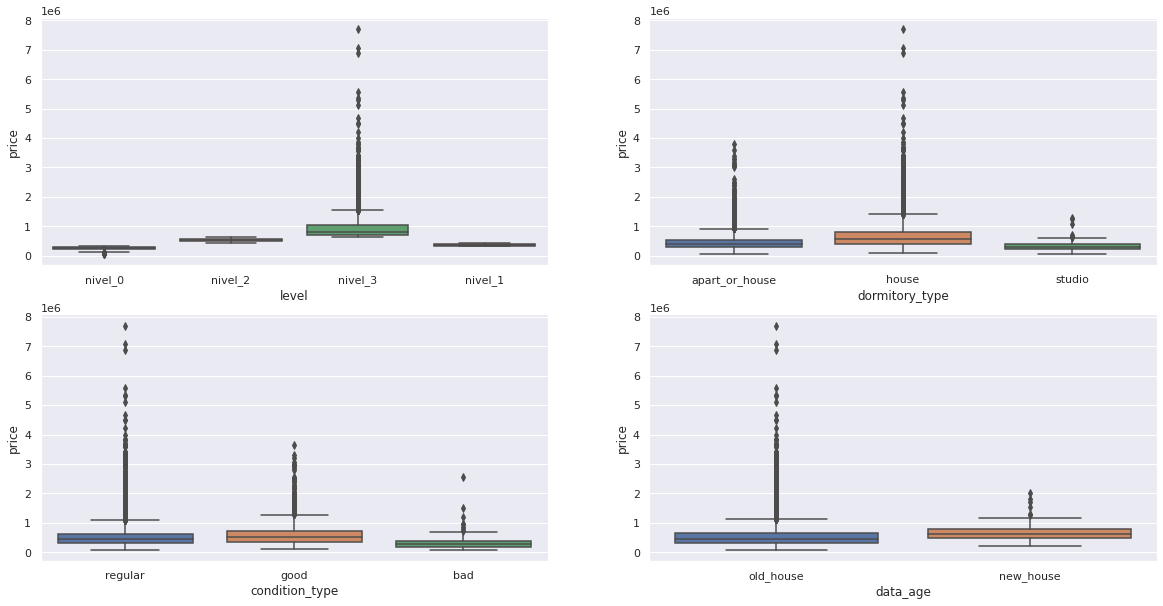

In [19]:
boxplot1('level', 'dormitory_type', 'condition_type', 'data_age', 'price', df3)

# 5.0 Passo 05 - ANALISE EXPLORATORIA DOS DADOS

In [20]:
df4 = df3.copy()

## 5.1 Analise Univariada

### 5.1.1 Reaponse Variable

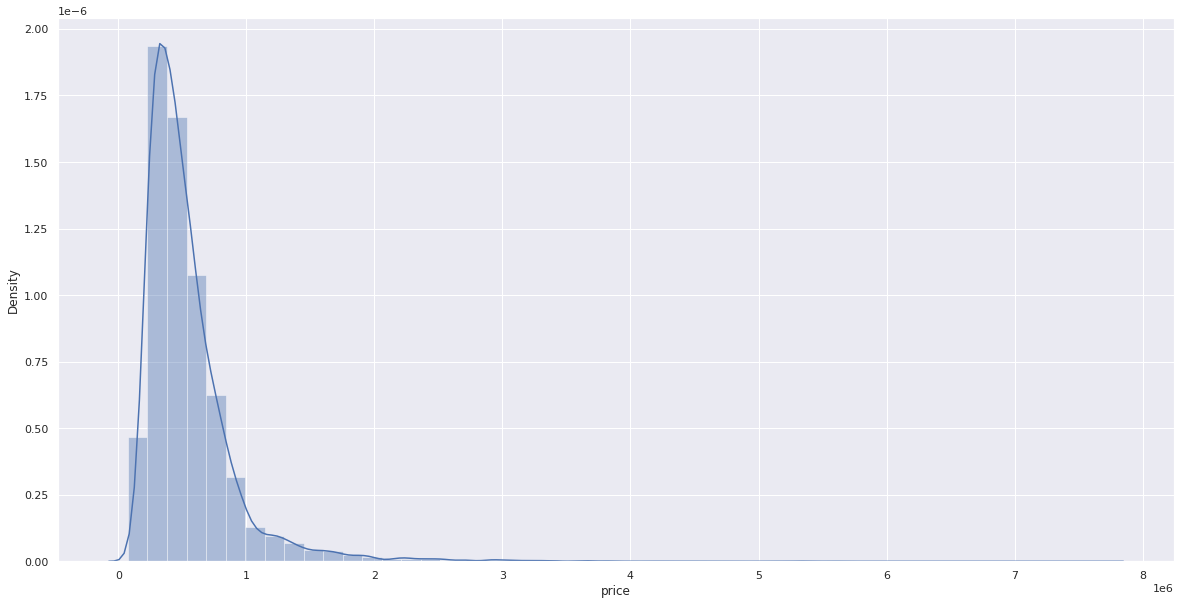

In [21]:
grafdisplot(df4['price'])

### 5.1.2 Numerical Variable

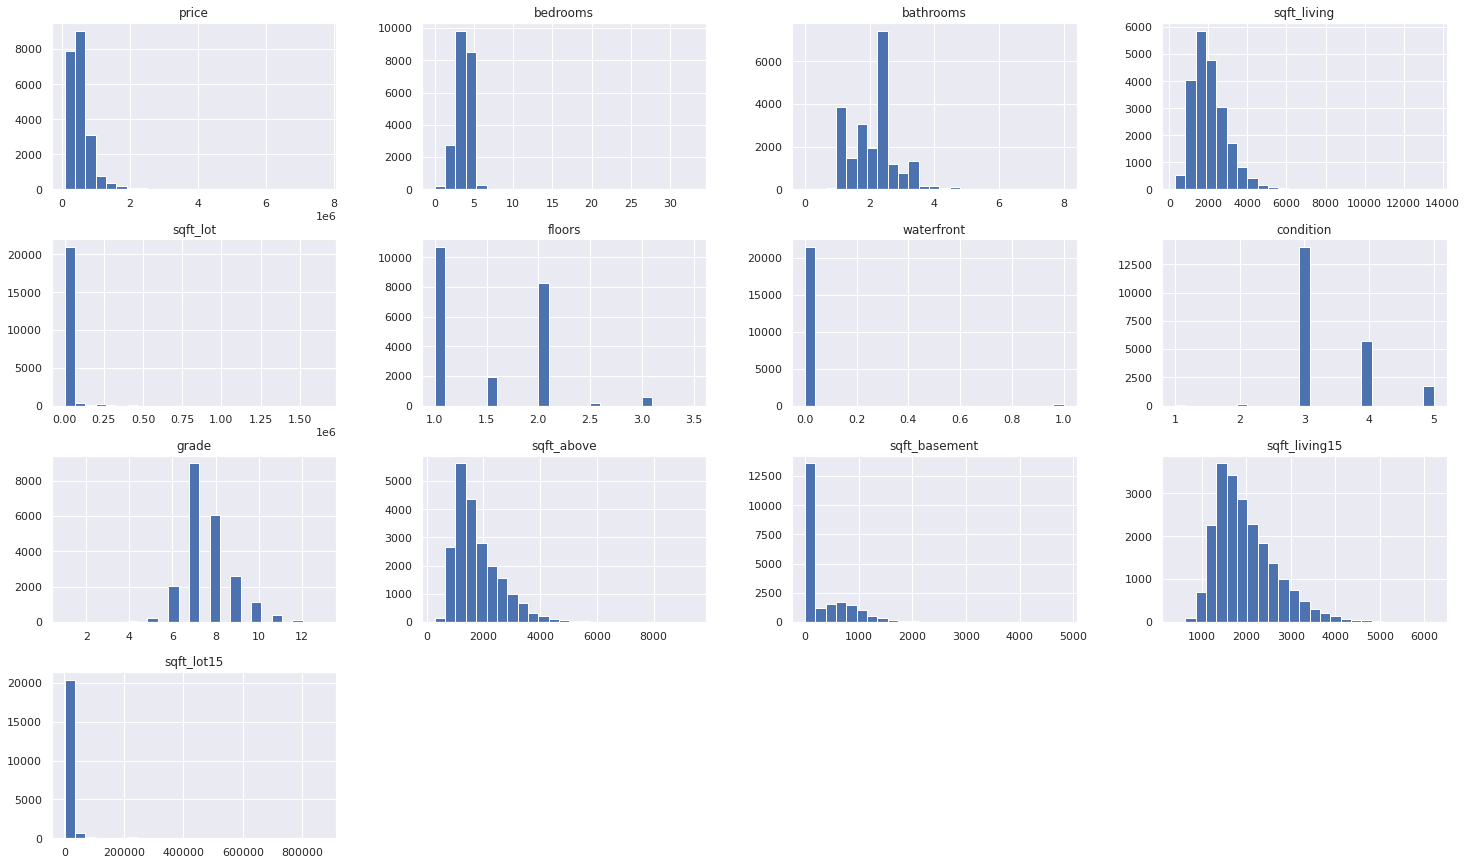

In [22]:
num_attributes.hist(bins=25, figsize=[25, 15]);

### 5.1.3 Categorical Variable

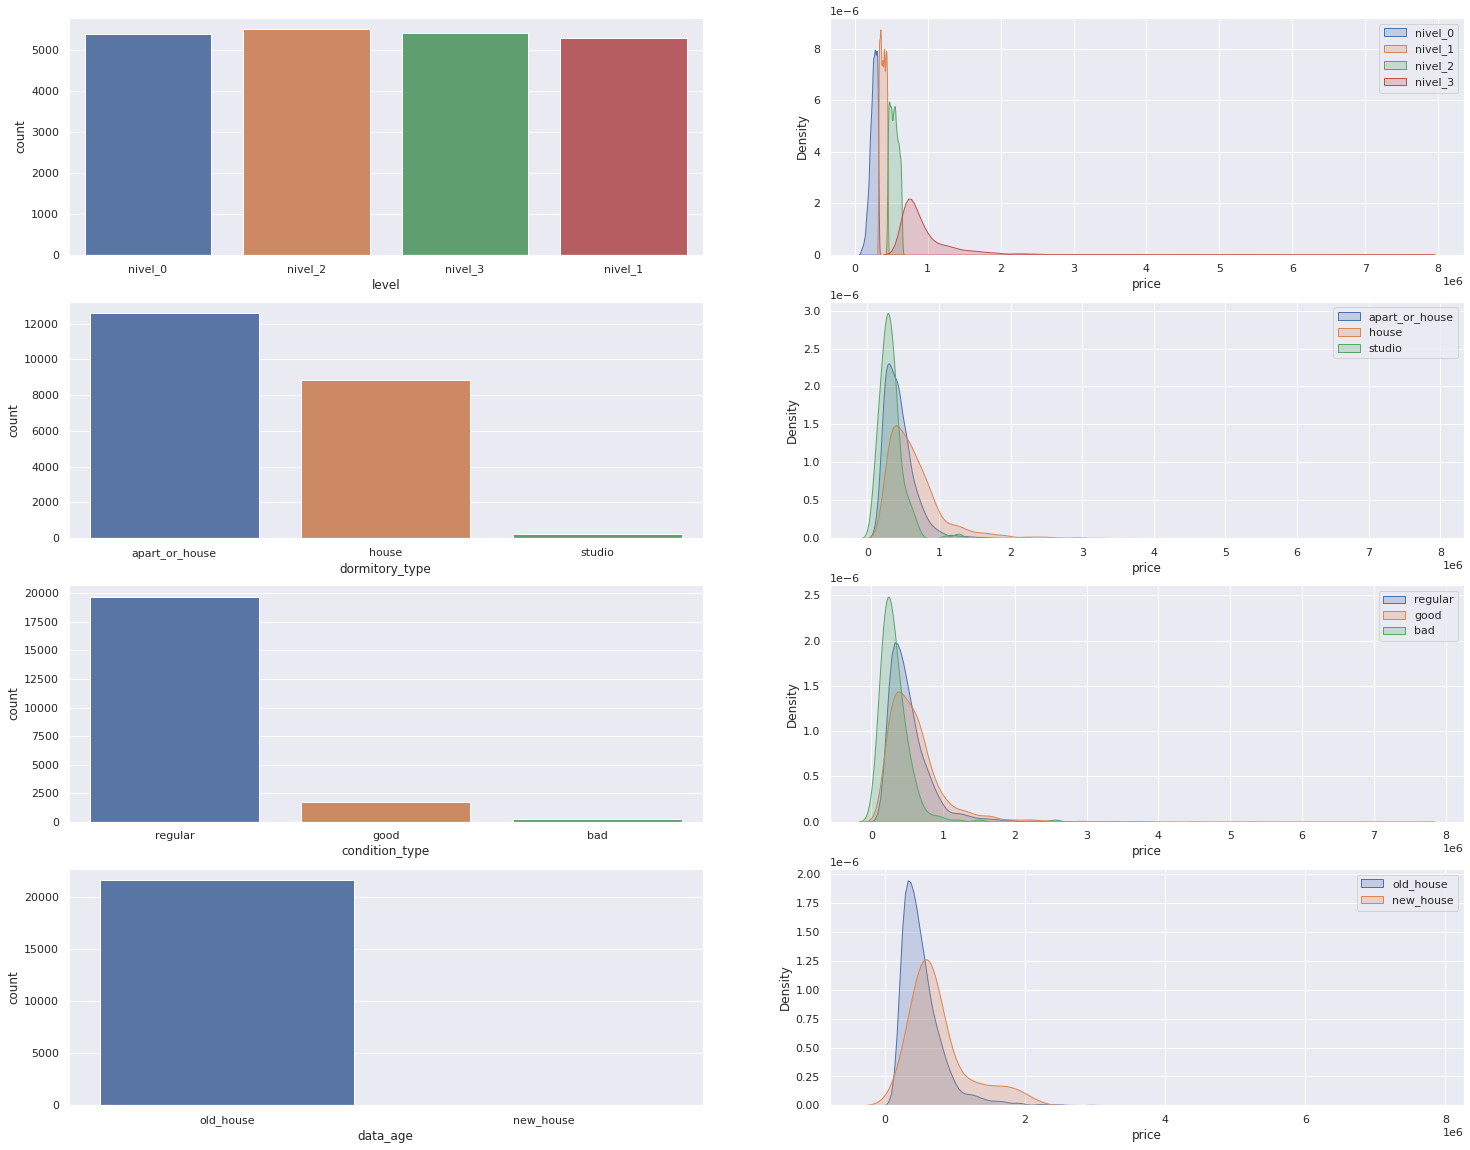

In [23]:
# level
co1 = df4['level']
c1 = df4[df4['level'] == 'nivel_0']['price']
l1 ='nivel_0'
c2 = df4[df4['level'] == 'nivel_1']['price']
l2 = 'nivel_1'
c3 = df4[df4['level'] == 'nivel_2']['price'] 
l3 = 'nivel_2'
c4 = df4[df4['level'] == 'nivel_3']['price'] 
l4 = 'nivel_3'

# dormitory_type
co2 = df4['dormitory_type']
c5 = df4[df4['dormitory_type'] == 'apart_or_house']['price']
l5 = 'apart_or_house'
c6 = df4[df4['dormitory_type'] == 'house']['price']
l6 = 'house'
c7 = df4[df4['dormitory_type'] == 'studio']['price']
l7 = 'studio'

# condition_type
co3 = df4['condition_type']
c8 = df4[df4['condition_type'] == 'regular']['price']
l8 = 'regular'
c9 = df4[df4['condition_type'] == 'good']['price']
l9 = 'good'
c10 = df4[df4['condition_type'] == 'bad']['price']
l10 = 'bad'

# data_age 
co4 = df4['data_age'] 
c11 = df4[df4['data_age'] == 'old_house']['price']
l11 = 'old_house'
c12 = df4[df4['data_age'] == 'new_house']['price'] 
l12 = 'new_house'


categoricalvar(co1, c1, l1, c2, l2, c3, l3, c4, l4,
                     co2, c5, l5, c6, l6, c7, l7,
                     co3, c8, l8, c9, l9, c10, l10,
                     co4, c11, l11, c12, l12)

## 5.2 Analise Bivariada

### H1: A maioria das casas com 3 quartos são acima da mediana do preço.
**FALSA**  A maioria das casa com 3 quartos são abaixo da mediana do preço.

Quantidade de casas com 3 quartos: 9824 uninidades
Quantidade de casas acima do valor da mediana dos preços: 4083 uninidades
Quantidade de casas abaixo do valor da mediana dos preços: 5741 unidades


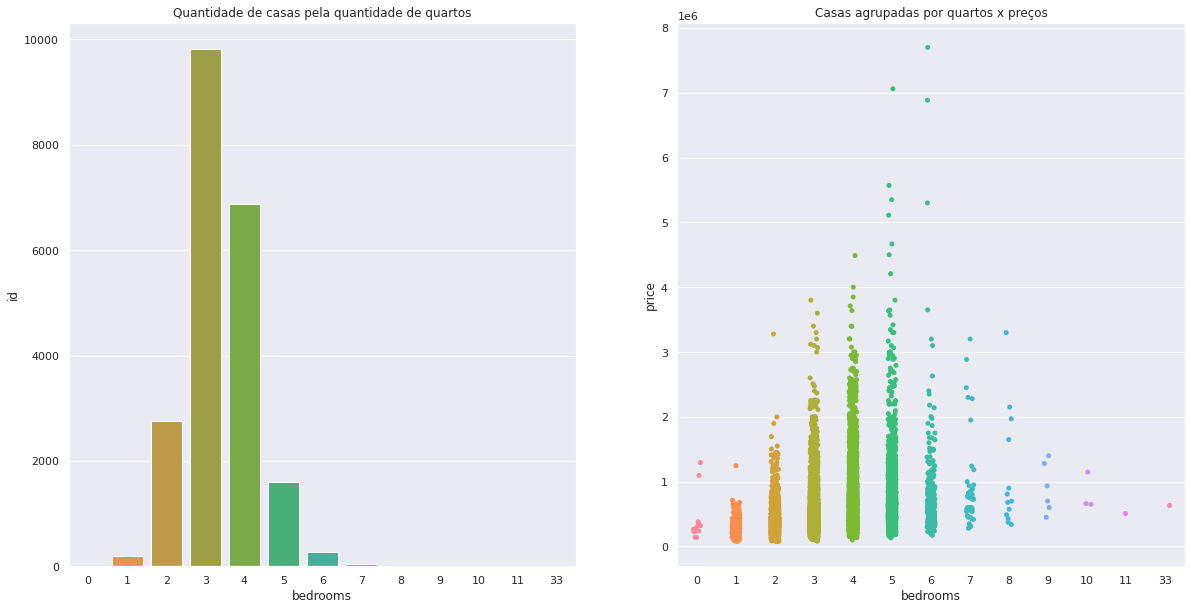

In [24]:
house_bed3 = len(df4[df4['bedrooms'] == 3])
h_upmedian = len(df4[(df4['bedrooms'] == 3) & (df4['price'] > df4['price'].median())])
h_belowmedian = len(df4[(df4['bedrooms'] == 3) & (df4['price'] <= df4['price'].median())])
print('Quantidade de casas com 3 quartos: {} uninidades'.format(house_bed3))
print('Quantidade de casas acima do valor da mediana dos preços: {} uninidades'.format(h_upmedian))
print('Quantidade de casas abaixo do valor da mediana dos preços: {} unidades'.format(h_belowmedian))

aux1 = df4[['bedrooms', 'id']].groupby('bedrooms').count().reset_index()

plt.subplot(1, 2, 1)
plt.title('Quantidade de casas pela quantidade de quartos')
sns.barplot(x='bedrooms', y='id', data=aux1, ci=None);

plt.subplot(1, 2, 2)
plt.title('Casas agrupadas por quartos x preços')
sns.stripplot(y = df4['price'], x = df4['bedrooms']);


### H2: A maioria das casas com 3 quartos e 2 banheiros são acima da mediana do preço.
**FALSA** A maioria das casa com 3 quartos e 2 banheiro são abaixo da mediana do preço.

Quantidade de casas com 3 quartos com 2 banheiros: 1048 uninidades
Quantidade de casas com 3 quartos com 2 banheiros acima do valor da mediana dos preços: 423 uninidades
Quantidade de casas com 3 quartos com 2 banheiros abaixo do valor da mediana dos preços: 625 unidades


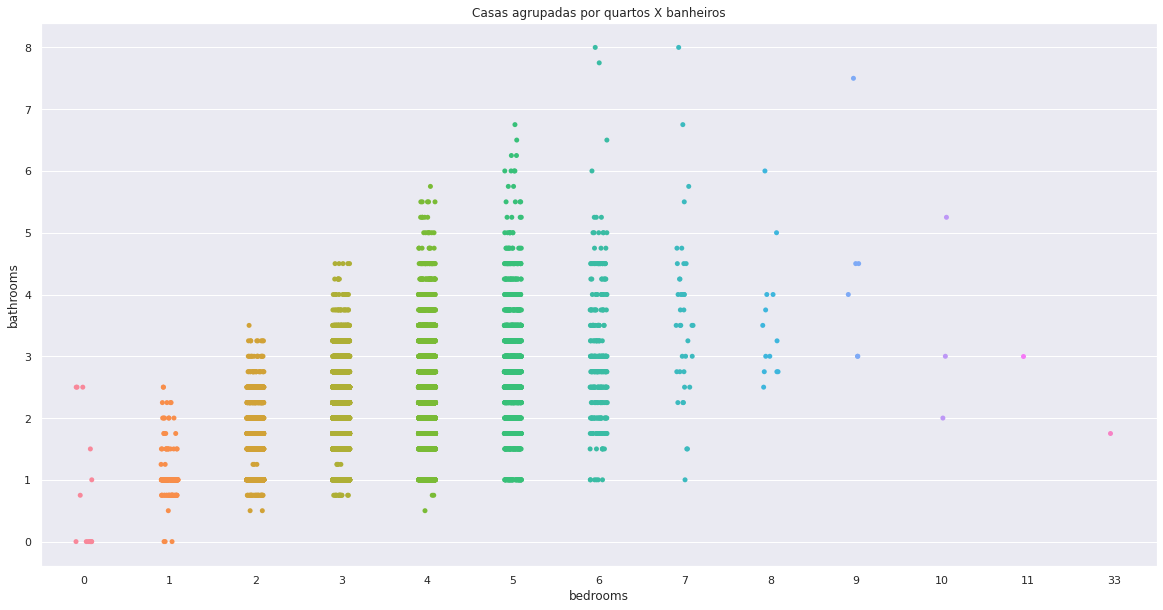

In [25]:
house_bed3bat2 = len(df4[(df4['bedrooms'] == 3) & (df4['bathrooms'] == 2)])

h1_upmedian = len(df4[(df4['bedrooms'] == 3) & 
                     (df4['bathrooms'] == 2) & 
                     (df4['price'] > df4['price'].median())])

h1_belowmedian = len(df4[(df4['bedrooms'] == 3) & 
                     (df4['bathrooms'] == 2) & 
                     (df4['price'] <= df4['price'].median())])

print('Quantidade de casas com 3 quartos com 2 banheiros: {} uninidades'.format(house_bed3bat2))
print('Quantidade de casas com 3 quartos com 2 banheiros acima do valor da mediana dos preços: {} uninidades'.format(h1_upmedian))
print('Quantidade de casas com 3 quartos com 2 banheiros abaixo do valor da mediana dos preços: {} unidades'.format(h1_belowmedian))

plt.title('Casas agrupadas por quartos X banheiros')
sns.stripplot(y = df4['bathrooms'], x = df4['bedrooms']);

### H3: A maioria das casas que tem 3 quartos e 2 banheiros são abaixo da mediana de m² construídos .
**VERDADEIRO** A maioria das casas que tem 3 quartos e 2 banheiros são abaixo da mediana de m² construídos.

In [26]:
# Converter pés quadrado para metros quadrados
dfc = df4.copy()
dfc['m2'] = dfc['sqft_living'] * 0.092903

h2_upmedian = len(dfc[(dfc['bedrooms'] == 3) & 
                      (dfc['bathrooms'] == 2) &
                      (dfc['m2'] > dfc['m2'].median())])

h2_belowmedian = len(dfc[(dfc['bedrooms'] == 3) & 
                         (dfc['bathrooms'] == 2) & 
                         (dfc['m2'] <= dfc['m2'].median())])

print('Quantidade de casas que tem 3 quartos e 2 banheiros são acima da mediana de m² construídos: {} unidades'
      .format(h2_upmedian))
print('Quantidade de casas que tem 3 quartos e 2 banheiros são abaixo da mediana de m² construídos: {} unidades'
      .format(h2_belowmedian))

Quantidade de casas que tem 3 quartos e 2 banheiros são acima da mediana de m² construídos: 279 unidades
Quantidade de casas que tem 3 quartos e 2 banheiros são abaixo da mediana de m² construídos: 769 unidades


### H4: Casas com com vista para água são 100% mais caras que a mediana do preço.
**VERDADEIRO** A maioria das casas são 100% mais caras que a mediana do preço.

Quantidade de casas com vista para água acima da mediana: 152 unidades
Quantidade de casas com vista para água abixo da mediana: 11 unidades
Quantidade de casas com vista para a água que são 100% mais caras que a mediana do preço: 114 unidades
Quantidade de casas com vista para a água que não são 100% mais caras que a mediana do preço: 38 unidades
           price  %_above_median
49     1350000.0          200.00
230     655000.0           45.56
246    2400000.0          433.33
300    3075000.0          583.33
457     705000.0           56.67
...          ...             ...
19984  1898000.0          321.78
20325  3000000.0          566.67
20767  2300000.0          411.11
21201  2230000.0          395.56
21576  3567000.0          692.67

[152 rows x 2 columns]


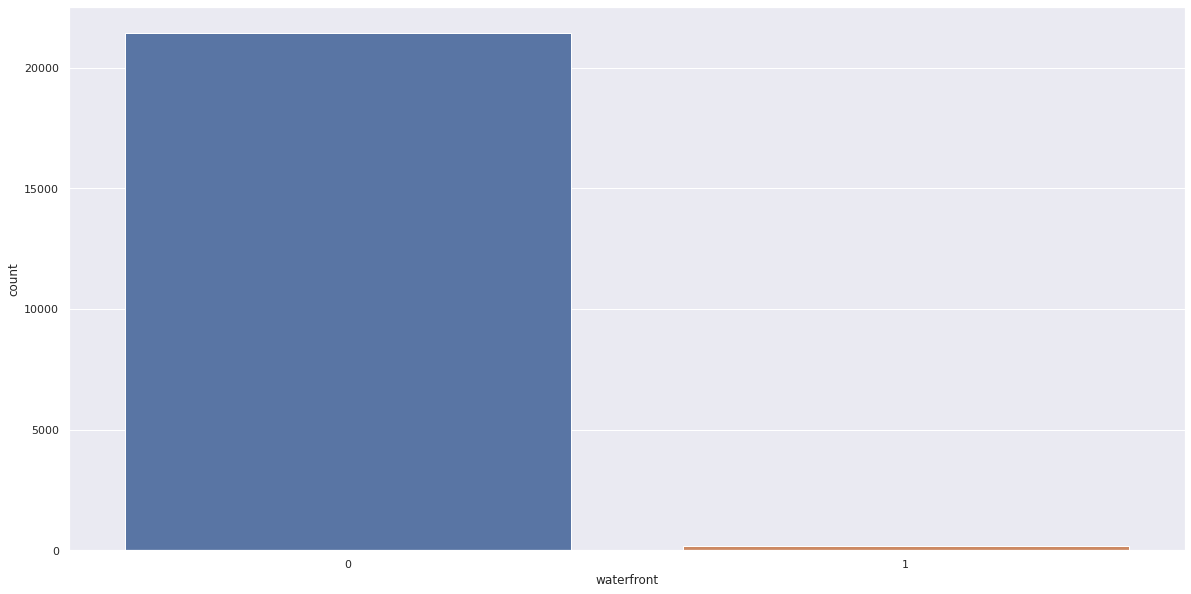

In [27]:
h_upwfront = len(df4[(df4['waterfront'] == 1) & (df4['price'] > df4['price'].median())])
h_belowwfront = len(df4[(df4['waterfront'] == 1) & (df4['price'] <= df4['price'].median())])

print('Quantidade de casas com vista para água acima da mediana: {} unidades'.format(h_upwfront))
print('Quantidade de casas com vista para água abixo da mediana: {} unidades'.format(h_belowwfront))

h_wf = df4[(df4['waterfront'] == 1) & (df4['price'] > df4['price'].median())]

h_wf['%_above_median'] = round(((h_wf['price'] - df4['price'].median()) / df4['price'].median()) * 100, 2)

hwf_above = len(h_wf[h_wf['%_above_median'] >= 100.0])
print('Quantidade de casas com vista para a água que são 100% mais caras que a mediana do preço: {} unidades'
      .format(hwf_above))

hwf_bolew = len(h_wf[h_wf['%_above_median'] < 100.0])
print('Quantidade de casas com vista para a água que não são 100% mais caras que a mediana do preço: {} unidades'
      .format(hwf_bolew))

price_wf = h_wf[['price', '%_above_median']]
print(price_wf)

sns.countplot(x=df4['waterfront']);

### H5: A maioria das casas com porão e 2 andares são mais caras que que a mediana do preço.
**VERDADEIRO** A maioria das casas são mais caras que a mediana do preço.

Quantidade de casas com 2 andares e com porão: 2046 unidades
Quantidade de casas com 2 andares e com porão acima da mediana: 1606 unidades
Quantidade de casas com 2 andares e com porão da mediana: 440 unidades


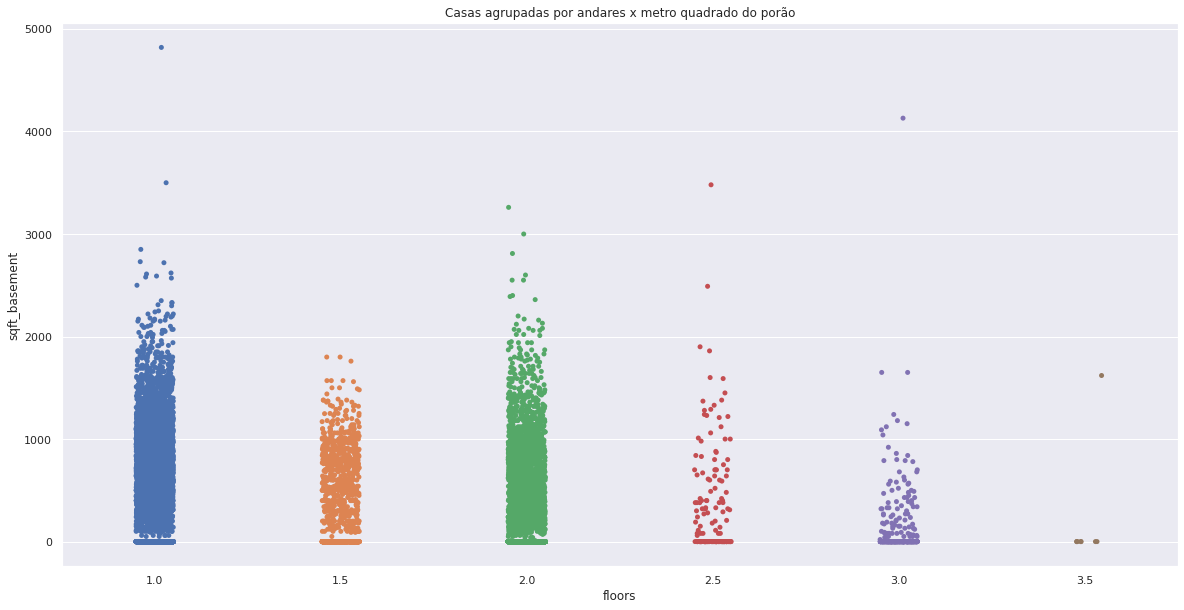

In [42]:
h_basfloors = len(df4[(df4['sqft_basement'] != 0) & (df4['floors'] == 2)])
h_upbf = len(df4[(df4['sqft_basement'] != 0) & (df4['floors'] == 2) & (df4['price'] > df4['price'].median())])
h_belowbf = len(df4[(df4['sqft_basement'] != 0) & (df4['floors'] == 2) & (df4['price'] <= df4['price'].median())])

print('Quantidade de casas com 2 andares e com porão: {} unidades'.format(h_basfloors))
print('Quantidade de casas com 2 andares e com porão acima da mediana: {} unidades'.format(h_upbf))
print('Quantidade de casas com 2 andares e com porão da mediana: {} unidades'.format(h_belowbf))

plt.title('Casas agrupadas por andares x metro quadrado do porão')
sns.stripplot(y = df4['sqft_basement'], x = df4['floors']);


### H6: Casas com a data de construção igual ou menor que 1955 são mais barato que a mediana do preço.
**VERDADE** Existe mais casa igual ou menor que 1955 que são acima da mediana, entretanto pode ser considerado um empate de quantidade de unidades que estão muito proximas na somatória.

In [58]:
h_belowyrbuilt = len(df4[(df4['yr_built'] <= 1955)])

print('Quantidade de casas abaixo de 1955: {} unidades'.format(h_belowyrbuilt))
print('\n')

h_1955 = df4[(df4['yr_built'] <= 1955)]
h_1955['%_above_median'] = np.round(((h_1955['price'] - df4['price'].median()) / df4['price'].median()) * 100, 2)

h_1955up = len(h_1955[h_1955['%_above_median'] >= 0])
print('Quantidade de casas abaixo de 1955 e acima da mediana: {} unidades'
      .format(h_1955up))

h_1955below = len(h_1955[h_1955['%_above_median'] < 0])
print('Quantidade de casas abaixo de 1955 e abaixo da mediana: {} unidades'
      .format(h_1955below))

h_1955 = h_1955[['yr_built', 'price', '%_above_median']]
h_1955


Quantidade de casas abaixo de 1955: 6435 unidades


Quantidade de casas abaixo de 1955 e acima da mediana: 3257 unidades
Quantidade de casas abaixo de 1955 e abaixo da mediana: 3178 unidades


,yr_built,price,%_above_median
0,1955,221900.0,-50.69
1,1951,538000.0,19.56
2,1933,180000.0,-60.00
11,1942,468000.0,4.00
12,1927,310000.0,-31.11
...,...,...,...
21240,1940,525000.0,16.67
21332,1920,245000.0,-45.56
21343,1953,332220.0,-26.17
21470,1943,249000.0,-44.67


### H7: A maioria das casas com datas acima de 1990 que tiveram reformas são mais caras que a mediana.


### H8: A maioria das casas com 2 andares e 2 banheiros são mais caro que a mediana do preço.


### H9: A maioria das casas com m² de contrução e m² do lote abaixo da mediana são mais baratos caro que a mediana do preço.


### H10: A maioria das casas acima do ano 2000 de construção são mais caras que a mediana do preço.